In [2]:
# Importing libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the data from url
df=pd.read_csv('House_Rental_Data.csv')

In [4]:
df

,Sqft,Floor,Total_Floor,Bedroom,Living_Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [5]:
# Checking for null values
df.isnull().sum()

Sqft           0
Floor          0
Total_Floor    0
Bedroom        0
Living_Room    0
Bathroom       0
Price          0
dtype: int64

In [6]:
# describe
df.describe()

,Sqft,Floor,Total_Floor,Bedroom,Living_Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [7]:
# Dividing the columns between categorical and continuous columns/features
categorical=['Floor','Total_Floor','Bedroom','Living_Room','Bathroom']
continuous=['Sqft','Price']

In [8]:
# to use categorical features we need to convert these to binary using pandas dummies
df_dummied=df
for col in categorical:
    dummies=pd.get_dummies(df_dummied[col],prefix=col)
    df_dummied=pd.concat([df_dummied,dummies],axis=1)
    df_dummied.drop(col,axis=1,inplace=True)

In [9]:
df_dummied

,Sqft,Price,Floor_1,Floor_2,Floor_3,Floor_4,Floor_5,Floor_6,Floor_7,Floor_8,...,Living_Room_1,Living_Room_2,Living_Room_3,Living_Room_4,Bathroom_0,Bathroom_1,Bathroom_2,Bathroom_3,Bathroom_4,Bathroom_5
0,1177.698,62000,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2134.800,78000,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1138.560,58000,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1458.780,45000,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,967.776,45000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,1359.156,45000,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
641,377.148,24800,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
642,740.064,45000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
643,1707.840,65000,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [10]:
# Finding optimal number of clusters/k using elbow method

ssd=[]

for k in range(1,15):
    km=KMeans(n_clusters=k)
    km=km.fit(df_dummied)
    ssd.append(km.inertia_)

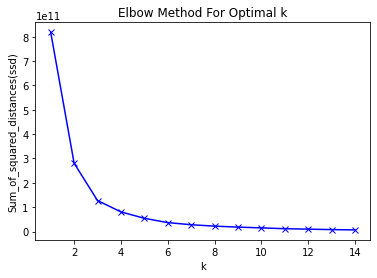

In [11]:
plt.plot(range(1,15), ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances(ssd)')
plt.title('Elbow Method For Optimal k')
plt.show()

In the plot the elbow is at k=4 indicating optimal k for this data set is 3

# Using KMeans

In [12]:
# storing cluster to which house belong within data
kmeans=KMeans(n_clusters=4)
df_dummied['Cluster']=kmeans.fit_predict(df_dummied)
df['Cluster']=df_dummied['Cluster'].astype('category')

In [13]:
df

,Sqft,Floor,Total_Floor,Bedroom,Living_Room,Bathroom,Price,Cluster
0,1177.698,2,7,2,2,2,62000,2
1,2134.800,5,7,4,2,2,78000,2
2,1138.560,5,7,2,2,1,58000,2
3,1458.780,2,7,3,2,2,45000,0
4,967.776,11,14,3,2,2,45000,0
...,...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000,0
641,377.148,4,10,1,1,1,24800,0
642,740.064,13,14,1,1,1,45000,0
643,1707.840,3,14,3,2,2,65000,2


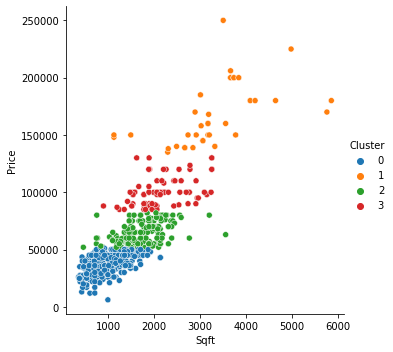

In [14]:
# Clusters representation along with Sqft
sns.relplot(data=df,hue='Cluster',y='Price',x='Sqft')

# Using NearestNeighbors

In [15]:
df=pd.read_csv('House_Rental_Data.csv')

In [16]:
# Scaling
minmax=MinMaxScaler()
df_scaled=minmax.fit_transform(df.values)

In [17]:
nn=NearestNeighbors(n_neighbors=4)

In [18]:
nn.fit(df_scaled)

NearestNeighbors(n_neighbors=4)

In [19]:
#Finding neighbors for the first row
nn.kneighbors(df_scaled[:1])

(array([[0.        , 0.07629159, 0.07904043, 0.07926479]]),
 array([[  0, 178, 330, 259]], dtype=int64))

In [20]:
df.iloc[[0,178,330,259]]

,Sqft,Floor,Total_Floor,Bedroom,Living_Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
178,1494.360,2,7,2,2,2,49800
330,1494.360,2,7,2,2,2,48800
259,1515.708,2,7,2,2,2,49800
